# Protein Structure Exercise

In this notebook we will use `matplotlib` to investigate some real experimental data.

Protein structures can be determined by X-ray crystallography experiments and are conventionally recorded as [PDB files](https://en.wikipedia.org/wiki/Protein_Data_Bank_(file_format)), which are structured text files details about the experiment itself, together with the 3D coordinates of each atom within the structure.

We will work with some data derived from the [1HMP](https://www.rcsb.org/structure/1HMP) structure, namely the dihedral angles, $\phi$(phi) and $\psi$(psi), of the carbon backbone.

<center><img src="../Resources/dihedral.png" style="height:300px" alt="By Dcrjsr, vectorised Adam Rędzikowski - Own work, CC BY 3.0, https://commons.wikimedia.org/w/index.php?curid=24585750"/></center>


<div align=right>(Image by Dcrjsr, vectorised Adam Rędzikowski, CC BY 3.0)</div>


The data have been provided as a plain text file containing two columns of numbers ($\phi$ and $\psi$), separated by tabs. There is one row for every $\text{C}_\alpha$ (i.e. backbone carbon atom) in the structure.

We can easily load the data into a 2-dimensional numpy array as shown:

In [1]:
import numpy as np
data = np.loadtxt('1hmp_mmtk.txt')

# showing just the first ten rows
data[:10,:]

array([[ -92.926842,   12.941312],
       [  65.796807, -162.229709],
       [ -81.132082,  121.413022],
       [ -85.523806,  137.173724],
       [-124.988754,   85.242472],
       [ -43.117225,  147.113709],
       [ -48.307914,  -29.941388],
       [ -88.163884,   -2.348568],
       [ -52.848368,  130.047635],
       [ -93.401285,   -4.973523]])

### Question: 
How many $\text{C}_\alpha$ atoms are there in this structure?

In [4]:
data.shape
len(data)



419

---

### Task: Summarise the data
Calculate summary statistics for the variables $\phi$ and $\psi$.

In [9]:
phi=data[:,0]
psi=data[:,1]

print("\nPHI SUMMARY")
print(f"Mean: {np.mean(phi):.1f}")
print(f"Standard deviation: {np.std(phi):.1f}")
print(f"Standard error of the mean: {np.std(phi)/np.sqrt(len(phi)):.1f}")
print(f"Median: {np.median(phi):.1f}")
print(f"Minimum: {np.min(phi):.1f}")
print(f"Maximum: {np.max(phi):.1f}")

print("\nPSI SUMMARY")
print(f"Mean: {np.mean(psi):.1f}")
print(f"Standard deviation: {np.std(psi):.1f}")
print(f"Standard error of the mean: {np.std(psi)/np.sqrt(len(psi)):.1f}")
print(f"Median: {np.median(psi):.1f}")
print(f"Minimum: {np.min(psi):.1f}")
print(f"Maximum: {np.max(psi):.1f}")




PHI SUMMARY
Mean: -76.7
Standard deviation: 55.3
Standard error of the mean: 2.7
Median: -82.2
Minimum: -178.9
Maximum: 161.1

PSI SUMMARY
Mean: 40.3
Standard deviation: 90.7
Standard error of the mean: 4.4
Median: 9.2
Minimum: -178.5
Maximum: 178.9


---

### Task: Visualise the data

Find a suitable way to visualise the distributions of $\phi$ and $\psi$.

Are any of your summary statistics actually useful for this data set?

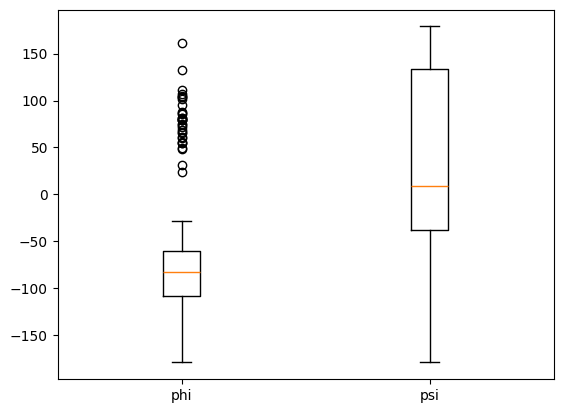

In [16]:
import matplotlib.pyplot as plt 

fig, axs=plt.subplots(1,1)
axs.boxplot(data)
axs.set_xticklabels(['phi', 'psi'])
plt.show()

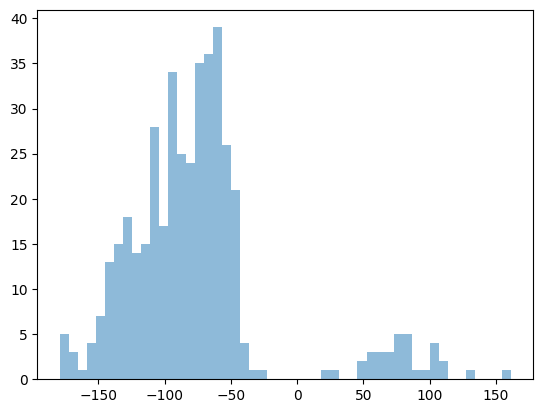

In [18]:
plt.hist(phi, bins=50, alpha=0.5, label='phi')
plt.show()

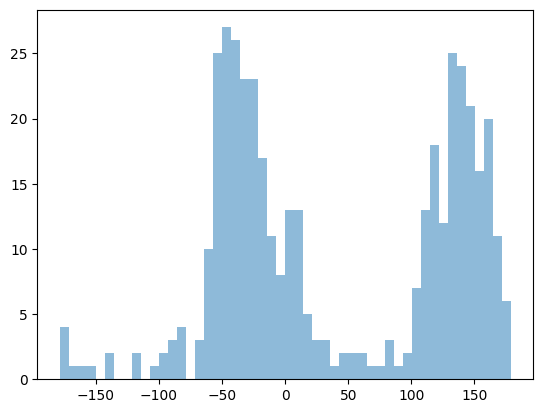

In [19]:
plt.hist(psi, bins=50, alpha=0.5, label='psi')
plt.show()


---

### Task: Joint distribution
Use a scatter plot to investigate the relationship between $\phi$ and $\psi$

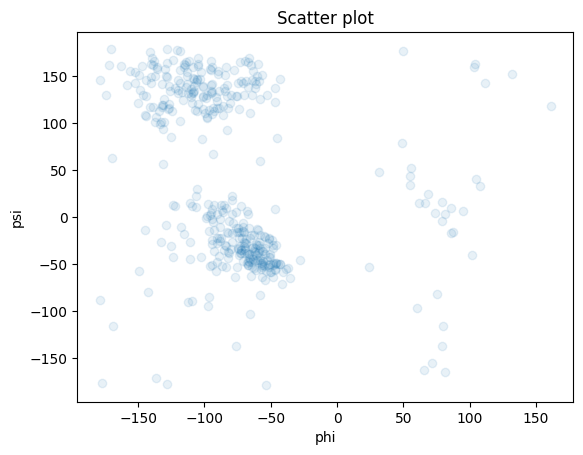

In [22]:
import matplotlib.pyplot as plt

plt.scatter(phi, psi, alpha=0.1)
plt.xlabel('phi')
plt.ylabel('psi')
plt.title('Scatter plot')
plt.show()

### Task: Gaussian mixture model

You should see that there are are several distinct "patches" of data in the scatter plot. This implies that there are certain combinations of ($\phi$,$\psi$) that are preferred by the protein.

One potentially useful way to summarise this joint distribution is as a mixture of 2D Gaussian (aka "Normal") component distributions. Each component will have its own centre on the 2D $\phi$-$\psi$ plane.

We can fit a simple three-component [Gaussian mixture model](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) like this:

In [184]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type='diag', random_state=0).fit(data)

The resulting model can report the coordinates of the three component centres:

In [ ]:
gmm.means_

And their *variances* in $\phi$ and $\psi$:

In [ ]:
gmm.covariances_

Can you now redraw the scatter plot, marking the centre of each fitted component and its standard deviation in $\phi$ and $\psi$?

### Question:
How could we improve on this model?

---

The general $\phi$-$\psi$ scatterplot is known as a [Ramachandran plot](https://en.wikipedia.org/wiki/Ramachandran_plot), describing the energetically favourable dihedral angles that are found in protein structures. - it is very useful for validation of structures that are computed from X-ray crystallography data.

Dihedral angle dataset was taken from
https://warwick.ac.uk/fac/sci/moac/people/students/peter_cock/r/ramachandran/
